In [ ]:
pip install -U tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import os
from tensorflow.keras.models import load_model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#### Insert here my x_train, y_train, x_test, y_test

In [ ]:
def preprocess_image(path_images, target_tuple, image_size, show_images):
    # Recover image_paths
    image_paths = [f for f in os.listdir(path_images) if os.path.isfile(os.path.join(path_images, f))]

    # iteramos sobre las imagenes
    imageRange = 100 # maximo len(image_paths)
    #print(imageRange)

    images, targets = [], []

    for i in range(0, imageRange): # i = 0, 1, ... , 750 (source full training independent of secret test)

        #print(path_images)

        # cargamos la imagen
        image = keras.utils.load_img(path_images + "/" + image_paths[i]) # <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x207 at 0x7CD26E127370>

        # obtenemos el tamaño de la imagen
        #(w, h) = image.size[:2]

        # reescalamos la imagen
        image = image.resize((image_size, image_size))

        # convertimos la imagen a un array y la almacenamos en la lista
        to_array = keras.utils.img_to_array(image)
        # to_array = to_array/255. # normalization of array not done in keras.io
        images.append(to_array)

        # Agregamos targets normalizados a la lista
        targets.append(target_tuple)

        # Switch para visualizar imagenes en el run
        if show_images == 1:
            plt.imshow(image)
            plt.axis('off')  # Turn off axis labels and ticks
            plt.show()

    return images, targets

In [ ]:
# Load dish dictionary with 101 dishes
dish_dict = {
    "0": "foie_gras",
    "1": "club_sandwich",
    "2": "cheese_plate",
    "3": "cup_cakes",
    "4": "garlic_bread",
    "5": "gnocchi",
    "6": "ice_cream",
    "7": "samosa",
    "8": "donuts",
    "9": "tuna_tartare",
    "10": "filet_mignon",
    "11": "seaweed_salad",
    "12": "french_toast",
    "13": "chicken_curry",
    "14": "shrimp_and_grits",
    "15": "steak",
    "16": "cheesecake",
    "17": "red_velvet_cake",
    "18": "waffles",
    "19": "churros",
    "20": "gyoza",
    "21": "lobster_roll_sandwich",
    "22": "huevos_rancheros",
    "23": "breakfast_burrito",
    "24": "grilled_cheese_sandwich",
    "25": "spaghetti_bolognese",
    "26": "falafel",
    "27": "poutine",
    "28": "greek_salad",
    "29": "beef_tartare",
    "30": "fried_calamari",
    "31": "guacamole",
    "32": "ravioli",
    "33": "lobster_bisque",
    "34": "beet_salad",
    "35": "risotto",
    "36": "crab_cakes",
    "37": "strawberry_shortcake",
    "38": "edamame",
    "39": "ceviche",
    "40": "hot_and_sour_soup",
    "41": "spring_rolls",
    "42": "sashimi",
    "43": "paella",
    "44": "clam_chowder",
    "45": "miso_soup",
    "46": "escargots",
    "47": "hot_dog",
    "48": "pulled_pork_sandwich",
    "49": "bruschetta",
    "50": "panna_cotta",
    "51": "fish_and_chips",
    "52": "pad_thai",
    "53": "tiramisu",
    "54": "takoyaki",
    "55": "macarons",
    "56": "apple_pie",
    "57": "cannoli",
    "58": "scallops",
    "59": "frozen_yogurt",
    "60": "chicken_quesadilla",
    "61": "mussels",
    "62": "beef_carpaccio",
    "63": "eggs_benedict",
    "64": "spaghetti_carbonara",
    "65": "omelette",
    "66": "sushi",
    "67": "chocolate_mousse",
    "68": "beignets",
    "69": "bibimbap",
    "70": "hummus",
    "71": "pork_chop",
    "72": "chicken_wings",
    "73": "grilled_salmon",
    "74": "chocolate_cake",
    "75": "tacos",
    "76": "hamburger",
    "77": "baby_back_ribs",
    "78": "pancakes",
    "79": "prime_rib",
    "80": "pizza",
    "81": "nachos",
    "82": "macaroni_and_cheese",
    "83": "bread_pudding",
    "84": "ramen",
    "85": "croque_madame",
    "86": "lasagna",
    "87": "peking_duck",
    "88": "deviled_eggs",
    "89": "french_fries",
    "90": "dumplings",
    "91": "fried_rice",
    "92": "french_onion_soup",
    "93": "pho",
    "94": "caprese_salad",
    "95": "oysters",
    "96": "baklava",
    "97": "creme_brulee",
    "98": "carrot_cake",
    "99": "onion_rings",
    "100": "caesar_salad"
    }

In [ ]:
# Define function to get key by value in a dictionary
def getKeyByValue(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key

In [ ]:
# Define function to get main key by value of inner dictionary
def findOuterKey(data, value_to_find):
    for outer_key, inner_dict in data.items():
        for inner_key, inner_value in inner_dict.items():
            if inner_value == value_to_find:
                return outer_key

In [ ]:
# Recorrer carpetas de training
#source_folder = "/content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/images_train/"
#source_folder = "/content/drive/MyDrive/kaggle_tarea2/images_train/"
source_folder = "/content/drive/MyDrive/Colab Notebooks/INF-395/Tarea-2/kaggle_tarea2/images_train/"

# Initialize full lists
images, targets = [], []

for foldername_train in os.listdir(source_folder):

    # foldername_train # apple_pie_train

    # Extract first part of folder name
    foldername = foldername_train.replace("_train", "") # apple_pie

    # Retain dish key in dish_dict
    dish_dict_key = getKeyByValue(dish_dict, foldername)
    dish_dict_key_norm = int(dish_dict_key) # normalization not done in keras.io

    # Retain food categorie key in hierarchy_dict
    #food_categorie_key_str = findOuterKey(hierarchy_dict, foldername)

    # Retain food categorie Number in food_categories_dict
    #food_categorie_key = getKeyByValue(food_categories_dict, food_categorie_key_str)
    #food_categorie_key = int(food_categorie_key) # convert to int

    # CASE 0: Multiple targets
    # dish: dish_num / dish_num normalized / food_categorie_str / food_categorie_key
    #print(foldername, ": ", dish_dict_key, dish_dict_key_norm, food_categorie_key_str, food_categorie_key)

    # CASE 1: Simplefied (1 target)
    # print(foldername, ": ", dish_dict_key, dish_dict_key_norm) # avoid printing for speed

    # Collect training folder full path of preprocessing
    path_images = os.path.join(source_folder, foldername_train) # /content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/images_train/apple_pie_train

    # Apply preprocess fun
    image_size = 32
    show_images = 0 # 1: show, 0: not show
    target_tuple = dish_dict_key_norm # according to certain dish & normalized
    images, targets = preprocess_image(path_images, target_tuple, image_size, show_images)

# Convert lists to numpy arrays
images = np.array(images)
targets = np.array(targets)

# convertimos las listas a arrays para el conjunto final de entrenamiento y validation (80% y 20% respectivamente)
(x_train), (y_train) = (
        np.asarray(images[: int(len(images) * 0.8)]),
        np.asarray(targets[: int(len(targets) * 0.8)]),
        )
(x_val), (y_val) = (
        np.asarray(images[int(len(images) * 0.8) :]),
        np.asarray(targets[int(len(targets) * 0.8) :]),
        )

# show shape results
print(images.shape)
print(targets.shape)

# save memory
del images
del targets

# reshape vectors
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1,1)

(100, 32, 32, 3)
(100,)


#### Guardar tensores para no volver a procesarlos

In [ ]:
# No borrar carpeta, aunque si se puede vaciar
saving_path = "/content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/saved_tensors/"

In [ ]:
# js
saving_path = "/content/drive/MyDrive/kaggle_tarea2/saved_tensors/"

In [ ]:
# No correr si ya estan guardados
#np.save(saving_path + 'x_train.npy', x_train)
#np.save(saving_path + 'y_train.npy', y_train)
#np.save(saving_path + 'x_val.npy', x_val)
#np.save(saving_path + 'y_val.npy', y_val)

In [ ]:
# Correr solo si ya estan guardados
x_train = np.load(saving_path + 'x_train.npy')
y_train = np.load(saving_path + 'y_train.npy')
x_val = np.load(saving_path + 'x_val.npy')
y_val = np.load(saving_path + 'y_val.npy')

#### Review shapes of subtraining and validation sets

In [ ]:
x_train.shape

(60608, 32, 32, 3)

In [ ]:
y_train.shape

(60608, 1)

In [ ]:
x_val.shape

(15152, 32, 32, 3)

In [ ]:
y_val.shape

(15152, 1)

#### Retake code of keras.io

In [ ]:
num_classes = 101
input_shape = (32, 32, 3)

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")

x_train shape: (60608, 32, 32, 3) - y_train shape: (60608, 1)
x_val shape: (15152, 32, 32, 3) - y_val shape: (15152, 1)


In [ ]:
x_train

array([[[[ 89.,  19.,  15.],
         [ 87.,  22.,  19.],
         [ 80.,  17.,  13.],
         ...,
         [198., 187., 155.],
         [197., 188., 155.],
         [196., 189., 158.]],

        [[ 83.,  21.,  17.],
         [ 79.,  21.,  16.],
         [ 71.,  16.,   9.],
         ...,
         [199., 190., 158.],
         [202., 193., 160.],
         [201., 194., 165.]],

        [[ 62.,  12.,   9.],
         [ 63.,  14.,   7.],
         [ 66.,  16.,   9.],
         ...,
         [195., 186., 154.],
         [198., 188., 154.],
         [199., 193., 162.]],

        ...,

        [[180., 186., 173.],
         [212., 216., 208.],
         [215., 221., 220.],
         ...,
         [196., 198., 203.],
         [198., 198., 205.],
         [197., 201., 210.]],

        [[159., 155., 139.],
         [213., 217., 212.],
         [216., 222., 221.],
         ...,
         [195., 198., 203.],
         [198., 201., 206.],
         [199., 202., 211.]],

        [[155., 144., 130.],
       

In [ ]:
y_train

array([[56],
       [56],
       [56],
       ...,
       [79],
       [79],
       [79]])

In [ ]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 100
image_size = 72  # We'll resize input images to this size (72 original)
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 72 X 72
Patch size: 6 X 6
Patches per image: 144
Elements per patch: 108


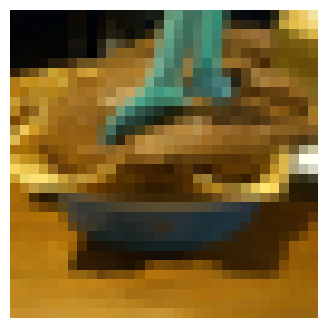

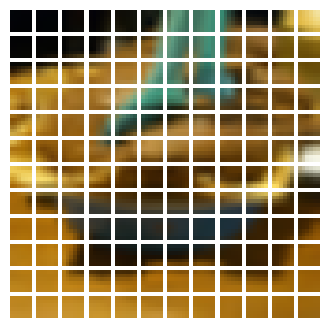

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [ ]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

In [ ]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_val, y_val)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/100
214/214 [==============================] - 98s 380ms/step - loss: 4.3940 - accuracy: 0.0321 - top-5-accuracy: 0.1285 - val_loss: 8.5717 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0000e+00
Epoch 2/100
214/214 [==============================] - 82s 382ms/step - loss: 3.9988 - accuracy: 0.0656 - top-5-accuracy: 0.2191 - val_loss: 11.5410 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0012
Epoch 3/100
214/214 [==============================] - 81s 380ms/step - loss: 3.8513 - accuracy: 0.0869 - top-5-accuracy: 0.2718 - val_loss: 12.2838 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.6499e-04
Epoch 4/100
214/214 [==============================] - 82s 384ms/step - loss: 3.7361 - accuracy: 0.1077 - top-5-accuracy: 0.3122 - val_loss: 11.6962 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 0.0026
Epoch 5/100
214/214 [==============================] - 81s 380ms/step - loss: 3.6506 - accuracy: 0.1232 - top-5-accuracy: 0.3432 - val_loss: 13.8102 - val_accuracy: 0.0000e+

In [ ]:
# Save the trained model
saving_path_new = "/content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/vit_classifier_model.h5"
vit_classifier.save(saving_path_new)

In [ ]:
# Save the trained model js
saving_path_new = "/content/drive/MyDrive/kaggle_tarea2/vit_classifier_model_imgsize_72.h5"
vit_classifier.save(saving_path_new)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Load model

In [ ]:
# Register the custom layers
tf.keras.utils.get_custom_objects()['Patches'] = Patches
tf.keras.utils.get_custom_objects()['PatchEncoder'] = PatchEncoder

# Load the saved model
loaded_model = load_model(saving_path_new)

# Now you can use 'loaded_model' for predictions
predictions = loaded_model.predict(x_val)  # Replace 'new_data' with your input data

474/474 [==============================] - 12s 22ms/step


In [ ]:
# shape of predictions will be (number of pictures of validation set, 101 because of classes)
predictions.shape

(15152, 101)

In [ ]:
# Assuming 'predictions' is your (number of pictures of validation set, 101) array
num_samples = predictions.shape[0]  # Number of samples

predicted_classes = np.zeros((num_samples, 1), dtype=np.int32)

for i in range(num_samples):
    predicted_classes[i, 0] = np.argmax(predictions[i])

# 'predicted_classes' is now a (number of pictures of validation set, 1) array with the predicted class indices
predicted_classes

array([[ 74],
       [ 24],
       [ 29],
       ...,
       [ 40],
       [ 98],
       [100]], dtype=int32)

#### Visualization of just first image of validation

(Por error se ejecutó cuando no se debió, pero no es relevante)

In [ ]:
# Assuming x_val is your 4D image array
pred_id = 0
image_to_plot = x_val[pred_id]  # Select the first image from the 4D array

# Rescale the pixel values to the [0, 1] range
image_to_plot = image_to_plot / 255.0  # If the values are in [0, 255]

plt.imshow(image_to_plot)
plt.axis('off')
plt.show()

# Assuming 'predictions[0]' is your array
class_index = np.argmax(predictions[pred_id])

# 'class_index' now contains the index of the class with the highest score
print(f"The predicted class is: {class_index}")
print(f"Dish:",dish_dict[str(class_index)])
print(f"Dish_real:",dish_dict[str(y_train[pred_id][0])])

NameError: ignored

In [ ]:
# Assuming x_val is your 4D image array
pred_id = 0
image_to_plot = x_train[pred_id]  # Select the first image from the 4D array

# Rescale the pixel values to the [0, 1] range
image_to_plot = image_to_plot / 255.0  # If the values are in [0, 255]

plt.imshow(image_to_plot)
plt.axis('off')
plt.show()

# Assuming 'predictions[0]' is your array
class_index = np.argmax(predictions[pred_id])

# 'class_index' now contains the index of the class with the highest score
print(f"The predicted class is: {class_index}")
print(f"Dish_predicted:",dish_dict[str(class_index)])
print(f"Dish_real:",dish_dict[str(y_train[pred_id][0])])

NameError: ignored

In [ ]:
# Load hierarchy dictionary
hierarchy_dict = {
    "salad": {
        "0": "seaweed_salad",
        "1": "beet_salad",
        "2": "caesar_salad",
        "3": "caprese_salad",
        "4": "greek_salad"
    },
    "dessert": {
        "0": "apple_pie",
        "1": "baklava",
        "2": "beignets",
        "3": "bread_pudding",
        "4": "cannoli",
        "5": "carrot_cake",
        "6": "cheesecake",
        "7": "chocolate_cake",
        "8": "chocolate_mousse",
        "9": "churros",
        "10": "creme_brulee",
        "11": "cup_cakes",
        "12": "donuts",
        "13": "frozen_yogurt",
        "14": "ice_cream",
        "15": "macarons",
        "16": "panna_cotta",
        "17": "red_velvet_cake",
        "18": "strawberry_shortcake",
        "19": "tiramisu",
        "20": "waffles"
    },
    "main_dish": {
        "0": "baby_back_ribs",
        "1": "beef_carpaccio",
        "2": "beef_tartare",
        "3": "bibimbap",
        "4": "breakfast_burrito",
        "5": "bruschetta",
        "6": "ceviche",
        "7": "cheese_plate",
        "8": "chicken_curry",
        "9": "chicken_quesadilla",
        "10": "chicken_wings",
        "11": "clam_chowder",
        "12": "club_sandwich",
        "13": "crab_cakes",
        "14": "croque_madame",
        "15": "deviled_eggs",
        "16": "dumplings",
        "17": "edamame",
        "18": "eggs_benedict",
        "19": "escargots",
        "20": "falafel",
        "21": "filet_mignon",
        "22": "fish_and_chips",
        "23": "foie_gras",
        "24": "french_fries",
        "25": "french_onion_soup",
        "26": "french_toast",
        "27": "fried_calamari",
        "28": "fried_rice",
        "29": "garlic_bread",
        "30": "gnocchi",
        "31": "grilled_cheese_sandwich",
        "32": "grilled_salmon",
        "33": "guacamole",
        "34": "gyoza",
        "35": "hamburger",
        "36": "hot_and_sour_soup",
        "37": "hot_dog",
        "38": "huevos_rancheros",
        "39": "hummus",
        "40": "lasagna",
        "41": "lobster_bisque",
        "42": "lobster_roll_sandwich",
        "43": "macaroni_and_cheese",
        "44": "miso_soup",
        "45": "mussels",
        "46": "nachos",
        "47": "omelette",
        "48": "onion_rings",
        "49": "oysters",
        "50": "pad_thai",
        "51": "paella",
        "52": "pancakes",
        "53": "peking_duck",
        "54": "pho",
        "55": "pizza",
        "56": "pork_chop",
        "57": "poutine",
        "58": "prime_rib",
        "59": "pulled_pork_sandwich",
        "60": "ramen",
        "61": "ravioli",
        "62": "risotto",
        "63": "samosa",
        "64": "sashimi",
        "65": "scallops",
        "66": "shrimp_and_grits",
        "67": "spaghetti_bolognese",
        "68": "spaghetti_carbonara",
        "69": "spring_rolls",
        "70": "steak",
        "71": "sushi",
        "72": "tacos",
        "73": "takoyaki",
        "74": "tuna_tartare"
    }
}

In [ ]:
# Load food categories dictionary with 3 superclasses
food_categories_dict = {
    "0": "salad",
    "1": "dessert",
    "2": "main_dish"
    }

In [ ]:
findOuterKey(hierarchy_dict, dish_dict[str(class_index)])

'salad'

In [ ]:
def preprocess_image_test(path_images, target_tuple, image_size, show_images):
    # Recuperar la lista de nombres de archivo de las imágenes en el directorio
    image_paths = [os.path.join(path_images, f) for f in os.listdir(path_images) if os.path.isfile(os.path.join(path_images, f))]

    images, targets = [], []

    for image_path in image_paths:
        # Cargamos la imagen
        image = keras.utils.load_img(image_path)

        # Reescalamos la imagen
        image = image.resize((image_size, image_size))

        # Convertimos la imagen a un array y la almacenamos en la lista
        to_array = keras.utils.img_to_array(image)
        images.append(to_array)

        # Agregamos targets normalizados a la lista
        targets.append(target_tuple)

        # Switch para visualizar imágenes en el run
        if show_images == 1:
            plt.imshow(image)
            plt.axis('off')  # Apagar etiquetas y marcas de los ejes
            plt.show()
    '''
    # iteramos sobre las imagenes
    imageRange = len(image_paths) # maximo
    #print(imageRange)

    for i in range(0, imageRange): # i = 0, 1, ... , 750 (source full training independent of secret test)

        #print(path_images)

        # cargamos la imagen
        image = keras.utils.load_img(path_images + "/" + image_paths[i]) # <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=427x207 at 0x7CD26E127370>

        # obtenemos el tamaño de la imagen
        #(w, h) = image.size[:2]

        # reescalamos la imagen
        image = image.resize((image_size, image_size))

        # convertimos la imagen a un array y la almacenamos en la lista
        to_array = keras.utils.img_to_array(image)
        # to_array = to_array/255. # normalization of array not done in keras.io
        images.append(to_array)

        # Agregamos targets normalizados a la lista
        targets.append(target_tuple)

        # Switch para visualizar imagenes en el run
        if show_images == 1:
            plt.imshow(image)
            plt.axis('off')  # Turn off axis labels and ticks
            plt.show()
    '''

    # Construir las rutas de las imágenes en el formato deseado
    formatted_image_paths = [os.path.join("images", os.path.basename(path_images), os.path.basename(image_path)) for image_path in image_paths]

    return images, targets, formatted_image_paths

In [ ]:
# Recorrer carpetas de training
#source_folder = "/content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/images_train/"
source_folder = "/content/drive/MyDrive/kaggle_tarea2/images_test/"

# Initialize full lists
test_images, test_targets, test_all_paths = [], [], []

for foldername in os.listdir(source_folder):

    # Retain dish key in dish_dict
    dish_dict_key = getKeyByValue(dish_dict, foldername)
    dish_dict_key_norm = int(dish_dict_key) # normalization not done in keras.io

    # Retain food categorie key in hierarchy_dict
    #food_categorie_key_str = findOuterKey(hierarchy_dict, foldername)

    # Retain food categorie Number in food_categories_dict
    #food_categorie_key = getKeyByValue(food_categories_dict, food_categorie_key_str)
    #food_categorie_key = int(food_categorie_key) # convert to int

    # CASE 0: Multiple targets
    # dish: dish_num / dish_num normalized / food_categorie_str / food_categorie_key
    #print(foldername, ": ", dish_dict_key, dish_dict_key_norm, food_categorie_key_str, food_categorie_key)

    # CASE 1: Simplefied (1 target)
    # print(foldername, ": ", dish_dict_key, dish_dict_key_norm) # avoid printing for speed

    # Collect training folder full path of preprocessing
    path_images = os.path.join(source_folder, foldername) # /content/drive/MyDrive/Colab Notebooks/kaggle_tarea2/images_train/apple_pie_train

    # Apply preprocess fun
    image_size = 32
    show_images = 0 # 1: show, 0: not show
    target_tuple = dish_dict_key_norm # according to certain dish & normalized
    images, targets, paths = preprocess_image_test(path_images, target_tuple, image_size, show_images)

    test_all_paths.extend(paths)
    test_images.extend(images)
    test_targets.extend(targets)

# Convert lists to numpy arrays
test_images = np.array(test_images)
test_targets = np.array(test_targets)

# convertimos las listas a arrays
(test_x), (test_y) = (np.asarray(test_images), np.asarray(test_targets))

# show shape results
print(test_images.shape)
print(test_targets.shape)

# save memory
#del test_images
del test_targets

# reshape vectors
test_y = test_y.reshape(-1, 1)

(25250, 32, 32, 3)
(25250,)


In [ ]:
test_x.shape

(25250, 32, 32, 3)

In [ ]:
len(test_all_paths)

25250

In [ ]:
test_all_paths[0]

'images/breakfast_burrito/1360734.jpg'

In [ ]:
keras.utils.get_custom_objects().update({"Patches": Patches, "PatchEncoder": PatchEncoder})

model = tf.keras.models.load_model('/content/drive/MyDrive/kaggle_tarea2/vit_classifier_model_imgsize_72.h5')

In [ ]:
predictions_kaggle = model.predict(test_x)

790/790 [==============================] - 465s 586ms/step


In [ ]:
predictions_kaggle.shape[0]

25250

In [ ]:
valores_kaggle = []
for i in range(predictions_kaggle.shape[0]):
    valores_kaggle.append(np.argmax(predictions_kaggle[i]))

In [ ]:
valores_kaggle

[96,
 24,
 100,
 10,
 44,
 26,
 23,
 22,
 36,
 65,
 72,
 1,
 61,
 20,
 19,
 13,
 95,
 69,
 57,
 26,
 2,
 88,
 65,
 94,
 31,
 20,
 2,
 39,
 20,
 100,
 81,
 22,
 96,
 63,
 2,
 23,
 88,
 60,
 52,
 23,
 23,
 30,
 52,
 36,
 23,
 23,
 70,
 51,
 76,
 60,
 96,
 76,
 76,
 65,
 95,
 60,
 47,
 1,
 51,
 52,
 69,
 22,
 60,
 23,
 63,
 47,
 59,
 98,
 1,
 82,
 86,
 26,
 56,
 51,
 22,
 88,
 69,
 81,
 65,
 60,
 70,
 23,
 23,
 70,
 2,
 65,
 49,
 22,
 86,
 23,
 99,
 1,
 88,
 60,
 65,
 59,
 63,
 52,
 20,
 26,
 63,
 61,
 63,
 60,
 78,
 23,
 63,
 13,
 73,
 99,
 74,
 98,
 47,
 77,
 60,
 86,
 21,
 68,
 100,
 22,
 23,
 85,
 2,
 12,
 23,
 83,
 1,
 96,
 1,
 43,
 85,
 98,
 40,
 23,
 57,
 81,
 76,
 98,
 45,
 57,
 24,
 70,
 98,
 51,
 22,
 60,
 49,
 91,
 52,
 22,
 65,
 20,
 78,
 13,
 49,
 22,
 20,
 60,
 36,
 69,
 52,
 22,
 1,
 22,
 47,
 12,
 22,
 36,
 1,
 12,
 60,
 51,
 30,
 1,
 23,
 96,
 63,
 23,
 100,
 2,
 69,
 23,
 63,
 28,
 70,
 4,
 67,
 23,
 23,
 1,
 36,
 36,
 12,
 23,
 60,
 23,
 20,
 1,
 3,
 22,
 59,
 89,
 77,


In [ ]:
import csv

# Crea una lista que contendrá las filas del archivo CSV
csv_data = []

# Itera a través de las rutas de las imágenes y los valores predecidos
for image_path, predicted_value in zip(test_all_paths, valores_kaggle):
    predicted_value_str = str(predicted_value)  # Convierte el valor entero a cadena
    food_category_key = findOuterKey(hierarchy_dict, dish_dict[predicted_value_str])
    # Encuentra la clave correspondiente en el diccionario "food_categories_dict"
    for key, value in food_categories_dict.items():
        if food_category_key == value:
            food_category_key = key

    # Agrega una fila al archivo CSV con la ruta de la imagen y los valores separados por espacio
    csv_data.append([image_path, f"{food_category_key} {predicted_value_str}"])

# Ruta completa del archivo CSV en la carpeta especificada
csv_filename = "/content/drive/MyDrive/kaggle_tarea2/not_submission.csv"

# Escribe los datos en el archivo CSV
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Escribe los datos
    csv_writer.writerows(csv_data)

In [ ]:
import matplotlib.pyplot as plt

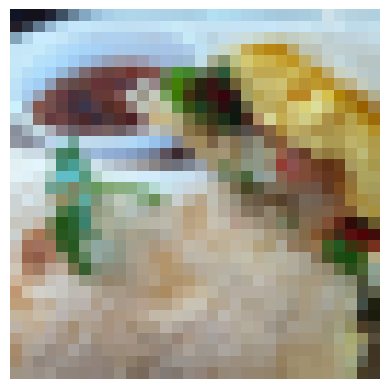

The predicted class is: 26
Dish: falafel
Dish_real: breakfast_burrito


In [ ]:
# Assuming x_val is your 4D image array
pred_id = 5
image_to_plot = test_x[pred_id]  # Select the first image from the 4D array

# Rescale the pixel values to the [0, 1] range
image_to_plot = image_to_plot / 255.0  # If the values are in [0, 255]

plt.imshow(image_to_plot)
plt.axis('off')
plt.show()

# Assuming 'predictions[0]' is your array
class_index = np.argmax(predictions_kaggle[pred_id])

# 'class_index' now contains the index of the class with the highest score
print(f"The predicted class is: {class_index}")
print(f"Dish:",dish_dict[str(class_index)])
print(f"Dish_real:",dish_dict[str(test_y[pred_id][0])])